<a href="https://colab.research.google.com/github/cocofafa/python-library/blob/master/09_07_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=48cdd15b2fb7189a5b0f29fee9e82f8a666a74e7caa456dab6a5f142fb449e6c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# Linear SVC

[LinearSVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
```
LinearSVC(penalty, loss, dual, tol, C, multi_class, fit_intercept, intercept_scaling, class_weight, verbose, random_state, max_iter)
```
- <font color=yellow> penalty : 규제에 사용 된 기준을 지정 (l1, l2) – default : l2 </font>
- loss : 손실함수
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font color=yellow> C : 규제 강도 </font>
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- verbose : 동작 과정에 대한 출력 메시지
- random_state : 난수 seed 설정
- max_iter : 계산에 사용할 작업 수

In [ ]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.svm import LinearSVC

In [ ]:
  # 데이터 로드
  X, y = make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 모델 학습
model = LinearSVC(C=1, max_iter=10000).fit(X, y)

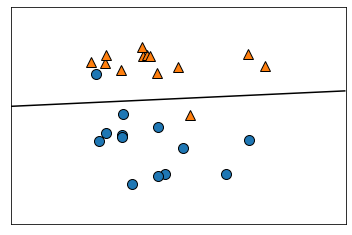

In [ ]:
# 결정경계 시각화
mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### C 값의 변화에 따른 결정경계의 변화


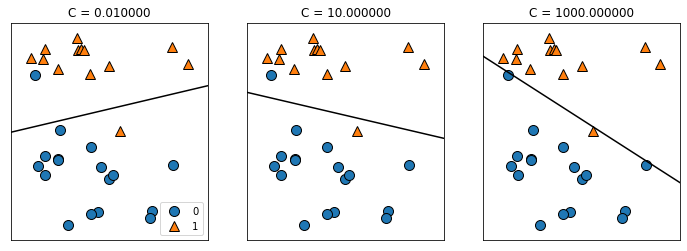

In [ ]:
# linear SVC 결정경계 변화
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 그림은 아주 작은 C 값 때문에 클래스 0은 아래쪽에 1은 위쪽에 대부분 배치, 2개가 잘못 분류 (결정경계가 수평에 가까움)
- C 값이 올라가면 결정경계가 기울어지며 최종적으로 클래스 0은 모두 아래쪽에 위치됨 -> 과대 적합

#### Linear SVC 실습 01

와인 데이터 분류

In [ ]:
from sklearn.datasets import load_wine

# 데이터 로드
wine = load_wine()

In [ ]:
# 훈련(학습)셋 및 테스트(평가)셋 분리
from sklearn.model_selection import train_test_split
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(133, 13)

In [ ]:
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(C=1, max_iter=100000, random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9699248120300752, 0.9333333333333333)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

#### Linear SVC 실습 02

붓꽃 데이터 분류

In [ ]:
# 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(112, 4)

In [ ]:
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(C=100, max_iter=1000000, random_state=0).fit(X_train, y_train)

In [ ]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9910714285714286, 0.9736842105263158)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

## Linear SVC와 Logistic Regression의 장단점

- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐
- 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요

- L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고 그렇지 않으면 기본적으로 L2 규제를 사용

- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver=’sag’ 옵션을 줌

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용